# Relatório de Análise VII

## Criando Agrupamentos

In [56]:
import pandas as pd

In [57]:
dados = pd.read_csv('dados/aluguel_residencial.csv', sep = ';')

In [58]:
dados.head(10)

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0
1,Casa,Jardim Botânico,2,0,1,100,7000.0,0.0,0.0
2,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
3,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,0.0
4,Apartamento,Cachambi,2,0,0,50,1300.0,301.0,17.0
5,Apartamento,Grajaú,2,1,0,70,1500.0,642.0,74.0
6,Apartamento,Lins de Vasconcelos,3,1,1,90,1500.0,455.0,14.0
7,Apartamento,Copacabana,1,0,1,40,2000.0,561.0,50.0
8,Quitinete,Copacabana,1,0,0,27,1800.0,501.0,0.0
9,Apartamento,Copacabana,4,3,1,243,13000.0,2000.0,803.0


### https://pandas.pydata.org/pandas-docs/stable/reference/index.html

In [59]:
dados['Valor'].mean()

4715.96327412386

In [60]:
bairros = ['Barra da Tijuca', 'Copacabana', 'Ipanema', 'Leblon', 'Botafogo', 'Flamengo', 'Tijuca']
selecao = dados['Bairro'].isin(bairros)
dados = dados[selecao]

In [61]:
dados

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0
7,Apartamento,Copacabana,1,0,1,40,2000.0,561.0,50.0
8,Quitinete,Copacabana,1,0,0,27,1800.0,501.0,0.0
9,Apartamento,Copacabana,4,3,1,243,13000.0,2000.0,803.0
11,Apartamento,Barra da Tijuca,2,1,1,67,1700.0,589.0,147.0
...,...,...,...,...,...,...,...,...,...
20820,Quitinete,Copacabana,1,0,0,22,1500.0,286.0,200.0
20821,Apartamento,Leblon,3,0,1,80,3000.0,1010.0,249.0
20822,Apartamento,Ipanema,3,1,2,150,15000.0,1400.0,600.0
20823,Apartamento,Tijuca,1,0,0,28,1000.0,360.0,25.0


In [62]:
dados['Bairro'].drop_duplicates()

0          Copacabana
11    Barra da Tijuca
12             Tijuca
15            Ipanema
19           Botafogo
23             Leblon
72           Flamengo
Name: Bairro, dtype: object

In [63]:
grupo_bairro = dados.groupby('Bairro')

In [64]:
grupo_bairro

In [65]:
grupo_bairro.groups

{'Barra da Tijuca': [11, 17, 26, 28, 31, 38, 54, 55, 58, 62, 68, 73, 87, 101, 104, 106, 111, 124, 126, 130, 144, 147, 149, 159, 165, 177, 180, 204, 211, 213, 222, 225, 228, 233, 260, 262, 276, 277, 279, 286, 294, 308, 318, 327, 342, 348, 350, 356, 362, 369, 371, 381, 392, 412, 413, 415, 416, 419, 428, 439, 440, 442, 450, 453, 461, 471, 477, 479, 487, 513, 514, 515, 516, 519, 523, 528, 530, 531, 559, 562, 563, 565, 569, 571, 576, 585, 603, 605, 611, 625, 627, 635, 646, 653, 662, 665, 666, 669, 672, 681, ...], 'Botafogo': [19, 43, 81, 82, 105, 113, 121, 128, 187, 191, 214, 317, 344, 395, 396, 475, 500, 502, 521, 568, 622, 655, 688, 724, 733, 787, 792, 826, 877, 886, 890, 961, 996, 1033, 1043, 1061, 1066, 1077, 1089, 1112, 1147, 1151, 1168, 1191, 1223, 1236, 1245, 1256, 1285, 1319, 1349, 1354, 1388, 1448, 1460, 1508, 1556, 1580, 1595, 1624, 1663, 1664, 1707, 1732, 1741, 1744, 1771, 1836, 1845, 1870, 1885, 1894, 1902, 1942, 1977, 1980, 1991, 1993, 1994, 1998, 2007, 2058, 2059, 2074, 2087, 

In [66]:
for bairro, data in grupo_bairro:
    print('{} -> {}'.format(bairro, data.Valor.mean()))

Barra da Tijuca -> 5776.047223047223
Botafogo -> 8779.477560414269
Copacabana -> 4125.6373959121875
Flamengo -> 4113.526610644258
Ipanema -> 9355.03686897334
Leblon -> 8558.508828250402
Tijuca -> 2043.52


In [67]:
grupo_bairro[['Valor', 'Condominio']].mean().round(2)

,Valor,Condominio
Bairro,,
Barra da Tijuca,5776.05,3899.19
Botafogo,8779.48,980.14
Copacabana,4125.64,1149.53
Flamengo,4113.53,1102.15
Ipanema,9355.04,2245.15
Leblon,8558.51,2099.71
Tijuca,2043.52,711.69


## Estatísticas Descritivas

In [68]:
grupo_bairro['Valor'].describe().round(2)

,count,mean,std,min,25%,50%,75%,max
Bairro,,,,,,,,
Barra da Tijuca,3367.0,5776.05,11736.06,800.0,2400.0,3600.0,6990.0,600000.0
Botafogo,869.0,8779.48,152551.95,700.0,2200.0,3000.0,4315.0,4500000.0
Copacabana,2642.0,4125.64,3611.92,100.0,2000.0,3000.0,4800.0,35000.0
Flamengo,714.0,4113.53,3839.13,800.0,1900.0,2900.0,4975.0,35000.0
Ipanema,1763.0,9355.04,8221.06,1200.0,4500.0,7000.0,11000.0,90000.0
Leblon,1246.0,8558.51,6666.90,100.0,4500.0,7000.0,10000.0,100000.0
Tijuca,1100.0,2043.52,1664.34,750.0,1500.0,1800.0,2300.0,45000.0


In [69]:
grupo_bairro['Valor'].aggregate(['min', 'max', 'sum']).rename(columns = {'min': 'Mínimo', 'max': 'Máximo', 'sum': 'Soma'})

,Mínimo,Máximo,Soma
Bairro,,,
Barra da Tijuca,800.0,600000.0,19447951.0
Botafogo,700.0,4500000.0,7629366.0
Copacabana,100.0,35000.0,10899934.0
Flamengo,800.0,35000.0,2937058.0
Ipanema,1200.0,90000.0,16492930.0
Leblon,100.0,100000.0,10663902.0
Tijuca,750.0,45000.0,2247872.0


In [70]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rc('figure', figsize = (20, 10))

Text(0.5, 1.0, 'Valor Médio do Aluguel por Bairro')

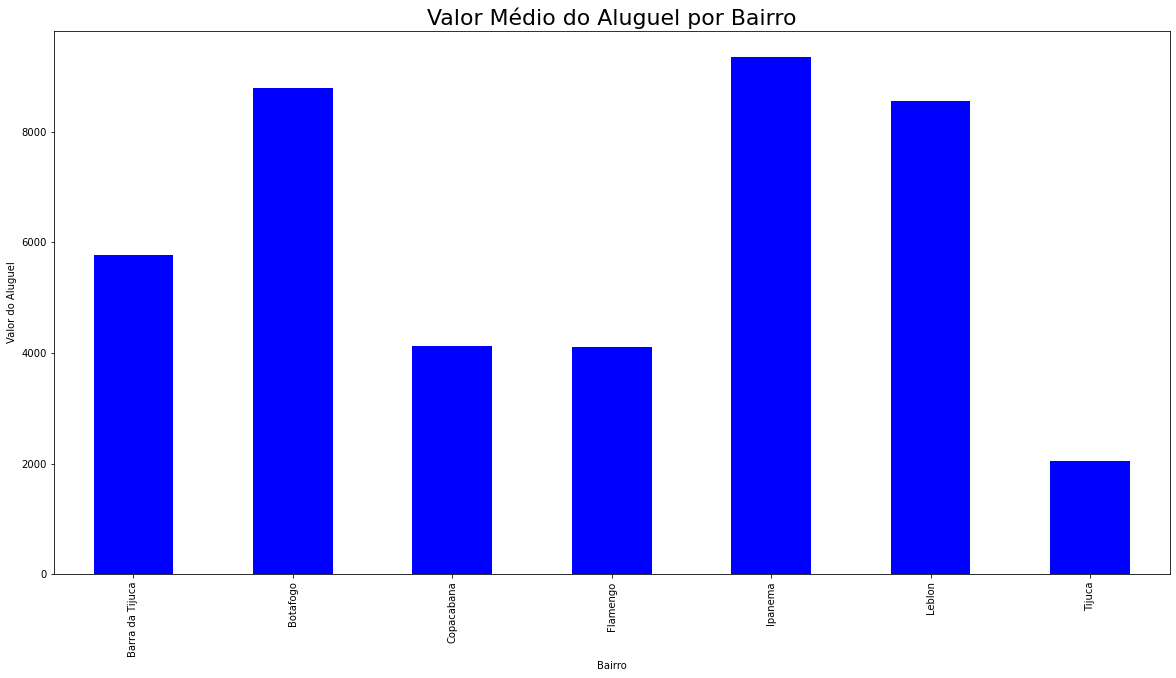

In [71]:
fig = grupo_bairro['Valor'].mean().plot.bar(color = 'blue')
fig.set_ylabel('Valor do Aluguel')
fig.set_title('Valor Médio do Aluguel por Bairro', {'fontsize': 22})

Text(0.5, 1.0, 'Valor Médio do Aluguel por Bairro')

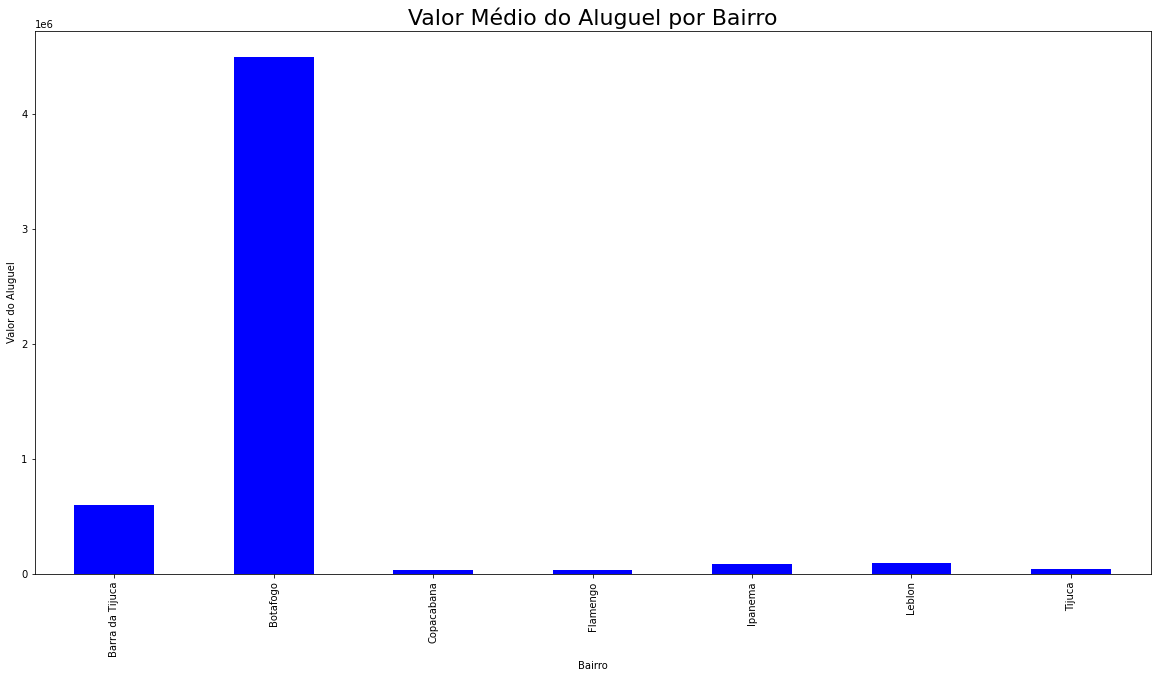

In [72]:
fig = grupo_bairro['Valor'].max().plot.bar(color = 'blue')
fig.set_ylabel('Valor do Aluguel')
fig.set_title('Valor Médio do Aluguel por Bairro', {'fontsize': 22})